In [1]:
# -q (quiet) 옵션은 설치 로그를 안보여줌(조용히함)
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# CSV 파일로 저장
titanic.to_csv("titanic_data.csv", index=False)

In [18]:
# 타이타닉 데이터셋 불러오기
# (pandas에 기본 내장된 예제 데이터셋)
import seaborn as sns

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

In [ ]:
# Col 결측치 합계
print(titanic.isnull().sum()) 
# 승객 등급 등장 빈도 (1, 2, 3 등석)
print(titanic['pclass'].value_counts().sort_index())
# 성별 진도 (남/녀)
print(titanic['sex'].value_counts().sort_index())
# 생존 여부 빈도 (생존율 / 사망자)
print(titanic['survived'].value_counts().sort_index())  # 사망 = 0, 생존 = 1

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
pclass
1    216
2    184
3    491
Name: count, dtype: int64
sex
female    314
male      577
Name: count, dtype: int64
survived
0    549
1    342
Name: count, dtype: int64


In [23]:
# 성별에 다른 생존율
survival_by_sex = titanic.groupby('sex')['survived'].mean()
print(survival_by_sex)
# 승객 등급에 따른 생존율
survival_by_class = titanic.groupby('pclass')['survived'].mean().sort_index()
print(survival_by_class)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [26]:
# 성별 & 승객 등급에 따른 생존
survival_by_sex_class = titanic.groupby(['sex', 'pclass'])['survived'].mean()
print(survival_by_sex_class)
# 나이 그룹별 생존율
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)  # 나이 구간 설정

survival_by_age_group = titanic.groupby('age_group')['survived'].mean()
print(survival_by_age_group)

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64
age_group
0-10     0.612903
11-20    0.401961
21-30    0.350000
31-40    0.437126
41-50    0.382022
51-60    0.416667
61-70    0.315789
71-80    0.000000
Name: survived, dtype: float64


C:\Users\trueb\AppData\Local\Temp\ipykernel_348\2627091270.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = titanic.groupby('age_group')['survived'].mean()


In [ ]:
# 혼자 탑승했는지 여부 - True면 혼자 탑승, False면 가족과 함께 탑승
print(titanic['alone'].value_counts())
# embark_town - 탑승지 이름
print(titanic['embark_town'].value_counts())
# sibsp - 함께 탑승한 형제 및 배우자 수
print(titanic['sibsp'].value_counts().sort_index())
# parch - 함께 탑승한 자녀 및 부모 수
print(titanic['parch'].value_counts().sort_index())  # 0 = 부모 및 자녀 없이 탑승 / 1 = 부모 또는 자녀 1명과 동행 외
# embarked - 탑승지 이름 앞글자
print(titanic['embarked'].value_counts())
# deck - 선실 번호 첫 알파벳
print(titanic['deck'].value_counts().sort_index())
# 등등. 유명한 Data 이기 때문에 데이터를 LLM에 입력시키지 않아도 찾을 수 있지만 값이 변할 수도 있기에 csv 파일로 다운 받아 LLM에 입력해서 추출


alone
True     537
False    354
Name: count, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64
parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: count, dtype: int64


In [61]:
titanic = sns.load_dataset('titanic')
# 결측치 확인
missing = titanic.isna().sum()
# 결측 있는 항목만 확인
missing[missing > 0]

# 결측 비율
missing_p = titanic.isna().mean() * 100
missing_p[missing_p > 0]

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [60]:
# 결측치 채우기
# age: 중요한 정보 : 평균/중앙값 대체
# embarked: 가장 많은 사람들이 탄 곳으로 대체
# deck: 추측 불가능(의믹 없음) -> 삭제

# 필요하다면, 카피떠서 진행
titanic_processed = titanic.copy()

# 비어있던 행 마스킹
age_mask =titanic['age'].isna()

# 나이 결측치 채우기 (남녀상관없이 전체평균으로 채움)
mean_age = titanic['age'].mean()
titanic_processed['age'] = titanic['age'].fillna(mean_age)

# 결측치 있는지 재확인
titanic_processed.isna().sum()

# 평균으로 채워진 값들만 확인
titanic_processed.loc[age_mask]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,29.699118,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,29.699118,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,29.699118,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,29.699118,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,29.699118,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 전체 평균으로 대체하는게 옯을까?
# 성별/객실별로 평균을 추전하는건?

# 모든 사람들을 성별/객실 그룹의 평균 나이로 바꾼 Serise
titanic.groupby(['sex', 'pclass'])['age'].transform('mean')

# 타이타닉의 age col 중 빈 값만 mean_age로 채움
titanic_processed['age'] = titanic['age'].fillna(mean_age)
# 원래 비어있던 애들만 확인 
titanic_processed.loc[titanic['age'].isna()]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,29.699118,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,29.699118,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,29.699118,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,29.699118,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,29.699118,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [62]:
# embarked (탑승 도시) -> 최빈값(가장 많이 탄 곳)

# 비어있는 항구 개수
titanic['embarked'].isna().sum()

# 최빈값 (Series - 벡터)
mode_embarked = titanic['embarked'].mode()[0]  # Series 에서 1개 뽑기
# 빈 값은 최빈값으로 교체
titanic_processed['embarked'] = titanic['embarked'].fillna(mode_embarked)

# 처리 완료 확인 (빈값 0개)
titanic_processed['embarked'].isna().sum()

np.int64(0)

In [63]:
# deck 은 77%가 비어있음 -> 삭제
titanic['deck'].isna().mean() * 100  # 빈값 비율

# 'deck' 컬럼은 삭제  - inplace 는 실행하면, 2번째 실행 불가능
titanic_processed.drop('deck', axis=1, inplace=True)

In [64]:
titanic_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


## `타이타닉 이상치 처리`


In [2]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 수치 데이터에만 집중
numeric_cols = ['age', 'fare']
print("타이타닉 데이터셋 기본 정보:")
print(titanic[numeric_cols].describe())

타이타닉 데이터셋 기본 정보:
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [ ]:
# 결측치(Missing Value) 처리 (이전에 배운 내용 활용)

# 성별/객실 그룹의 평균 나이로 결측치 채우기

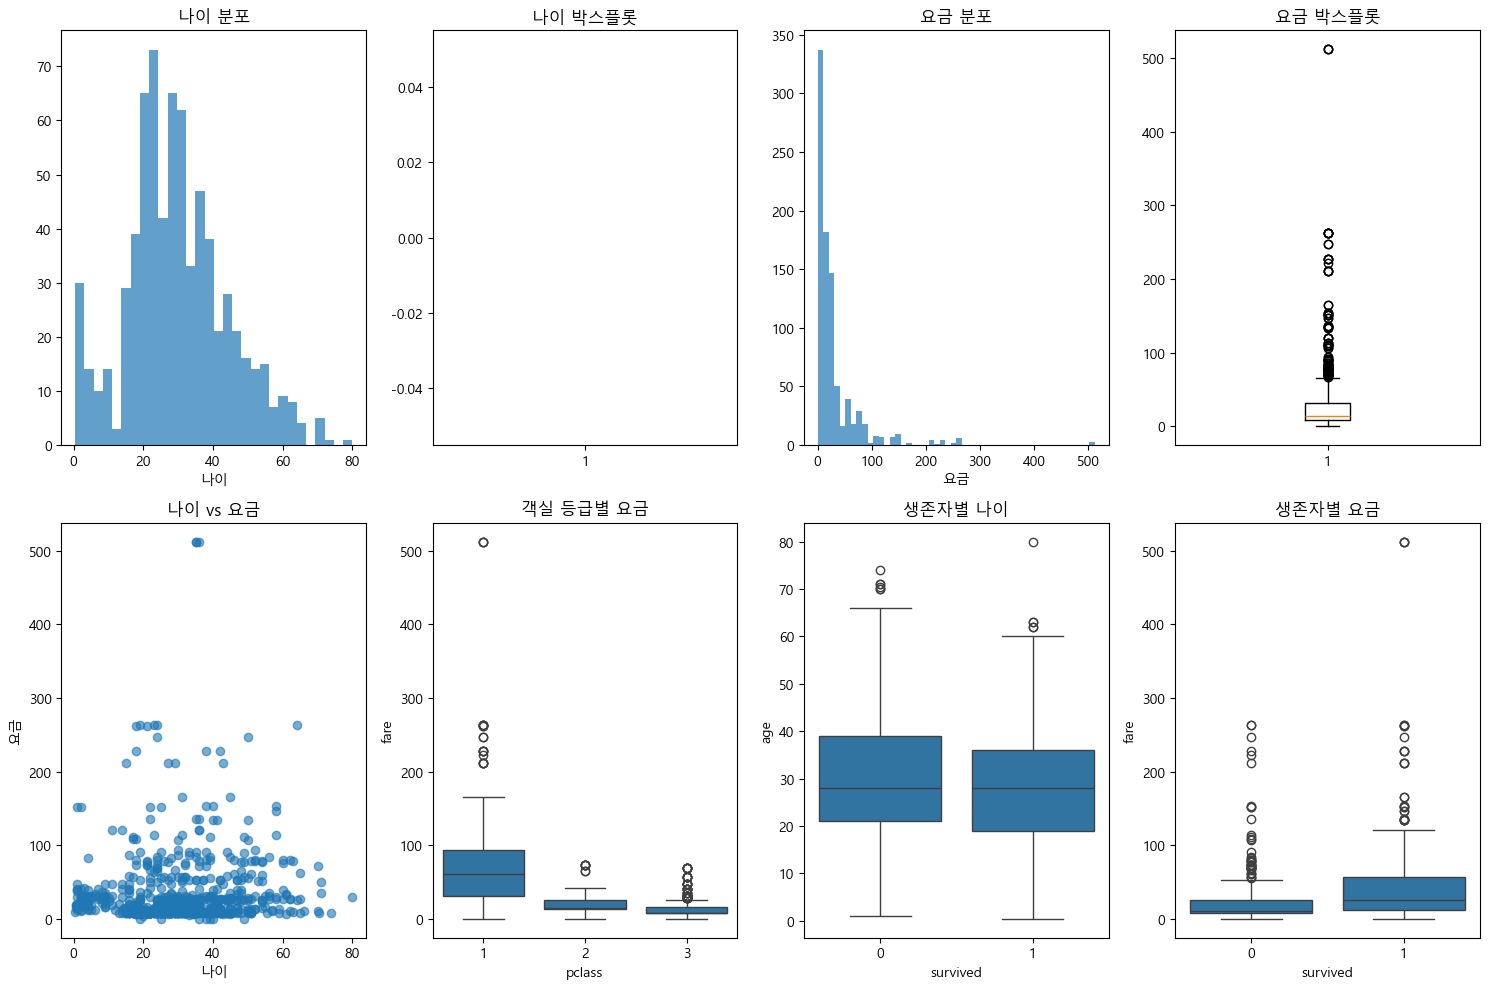

In [3]:
# 결측치 처리 안하면 제대로 시각화 제대로 안나옴

# 1. 이상치 탐지 및 시각화
plt.figure(figsize=(15, 10))

# 나이 분포
plt.subplot(2, 4, 1)
plt.hist(titanic['age'], bins=30, alpha=0.7)
plt.title('나이 분포')
plt.xlabel('나이')

plt.subplot(2, 4, 2)
plt.boxplot(titanic['age'])
plt.title('나이 박스플롯')

# 요금 분포
plt.subplot(2, 4, 3)
plt.hist(titanic['fare'], bins=50, alpha=0.7)
plt.title('요금 분포')
plt.xlabel('요금')

plt.subplot(2, 4, 4)
plt.boxplot(titanic['fare'])
plt.title('요금 박스플롯')

# 산점도
plt.subplot(2, 4, 5)
plt.scatter(titanic['age'], titanic['fare'], alpha=0.6)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('나이 vs 요금')

# 객실 등급별 요금 분포
plt.subplot(2, 4, 6)
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title('객실 등급별 요금')

# 생존자별 나이 분포
plt.subplot(2, 4, 7)
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('생존자별 나이')

# 생존자별 요금 분포
plt.subplot(2, 4, 8)
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('생존자별 요금')

plt.tight_layout()
plt.show()

In [ ]:
# 2. 요금 데이터의 이상치 분석
# IQR 방법으로 이상치 탐지

import pandas as pd

# 데이터 로드
df = pd.read_csv("titanic_data.csv")  # 파일 경로에 맞게 조정하세요

# IQR 계산
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1

# 이상치 판단 기준
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 필터링
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]

# 결과 출력
print(f"Q1: {q1:.4f}")
print(f"Q3: {q3:.4f}")
print(f"IQR: {iqr:.4f}")
print(f"Lower Bound: {lower_bound:.4f}")
print(f"Upper Bound: {upper_bound:.4f}")
print(f"이상치 개수: {len(outliers)}")
print(outliers[['fare']])

Q1: 7.9104
Q3: 31.0000
IQR: 23.0896
Lower Bound: -26.7240
Upper Bound: 65.6344
이상치 개수: 116
         fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


In [5]:
# 이상치에 해당하는 승객들 특성 분석

# 1. IQR 계산
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 2. 이상치 필터링
fare_outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]

# 3. 특성 분석을 위한 주요 컬럼 선택
selected_cols = ['fare', 'pclass', 'sex', 'age', 'embarked', 'survived', 'alone']
outlier_data = fare_outliers[selected_cols]

# 4. 요약 통계 출력
summary = outlier_data.describe(include='all')

# 5. 결과 출력
print("Fare 이상치 기준:")
print(f"Q1 = {q1:.2f}, Q3 = {q3:.2f}, IQR = {iqr:.2f}")
print(f"Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
print(f"이상치 개수: {len(fare_outliers)}\n")
print("이상치 승객 특성 요약:")
print(summary)

Fare 이상치 기준:
Q1 = 7.91, Q3 = 31.00, IQR = 23.09
Lower bound = -26.72, Upper bound = 65.63
이상치 개수: 116

이상치 승객 특성 요약:
              fare      pclass     sex         age embarked    survived  alone
count   116.000000  116.000000     116  101.000000      114  116.000000    116
unique         NaN         NaN       2         NaN        3         NaN      2
top            NaN         NaN  female         NaN        S         NaN  False
freq           NaN         NaN      70         NaN       60         NaN     82
mean    128.291629    1.163793     NaN   34.266535      NaN    0.681034    NaN
std      84.636908    0.509799     NaN   14.717035      NaN    0.468098    NaN
min      66.600000    1.000000     NaN    0.920000      NaN    0.000000    NaN
25%      78.189600    1.000000     NaN   23.000000      NaN    0.000000    NaN
50%      90.000000    1.000000     NaN   35.000000      NaN    1.000000    NaN
75%     147.778100    1.000000     NaN   45.000000      NaN    1.000000    NaN
max     512.32

In [7]:
# 3. 객실 등급을 고려한 이상치 분석
# 객실 등급별로 요금 이상치 탐지

# 등급별 이상치 탐지
for pclass in sorted(df['pclass'].unique()):
    subset = df[df['pclass'] == pclass]
    
    # IQR 계산
    q1 = subset['fare'].quantile(0.25)
    q3 = subset['fare'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 이상치 필터링
    outliers = subset[(subset['fare'] < lower_bound) | (subset['fare'] > upper_bound)]
    
    # 결과 출력
    print(f"\nPclass = {pclass}")
    print(f"Q1 = {q1:.2f}, Q3 = {q3:.2f}, IQR = {iqr:.2f}")
    print(f"Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
    print(f"이상치 수 = {len(outliers)}명")


Pclass = 1
Q1 = 30.92, Q3 = 93.50, IQR = 62.58
Lower bound = -62.94, Upper bound = 187.36
이상치 수 = 20명

Pclass = 2
Q1 = 13.00, Q3 = 26.00, IQR = 13.00
Lower bound = -6.50, Upper bound = 45.50
이상치 수 = 7명

Pclass = 3
Q1 = 7.75, Q3 = 15.50, IQR = 7.75
Lower bound = -3.88, Upper bound = 27.12
이상치 수 = 52명


In [8]:
# 4. 이상치 처리 방법 적용 및 비교
# 방법 1: 제거

# 1. IQR 계산
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 2. 이상치 제거
df_cleaned = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# 3. 결과 확인
print(f"원본 데이터 수: {len(df)}")
print(f"제거된 이상치 수: {len(df) - len(df_cleaned)}")
print(f"이상치 제거 후 데이터 수: {len(df_cleaned)}")

원본 데이터 수: 891
제거된 이상치 수: 116
이상치 제거 후 데이터 수: 775


In [ ]:
# 방법 2: 윈저화 (95% 백분위수로 제한)

# 95% 상한값 계산
fare_95 = df['fare'].quantile(0.95)

# 윈저화 적용: 95% 이상은 상한값으로 대체
df['fare_winsorized'] = df['fare'].apply(lambda x: min(x, fare_95))

# 결과 비교 출력
print(f"원래 최대 요금: {df['fare'].max():.2f}")
print(f"95% 상한값: {fare_95:.2f}")
print(f"윈저화 이후 최대 요금: {df['fare_winsorized'].max():.2f}")

원래 최대 요금: 512.33
95% 상한값: 112.08
윈저화 이후 최대 요금: 112.08


In [10]:
# 방법 3: 객실 등급별 중앙값으로 대체

# 복사본 생성
df_replaced = df.copy()

# 이상치 판단 기준 (전체 IQR 기준)
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 대체 처리
for pclass in sorted(df['pclass'].unique()):
    # 등급별 중앙값
    class_median = df[(df['pclass'] == pclass) & (df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]['fare'].median()

    # 이상치 위치
    condition = (df['pclass'] == pclass) & ((df['fare'] < lower_bound) | (df['fare'] > upper_bound))
    
    # 대체 수행
    df_replaced.loc[condition, 'fare'] = class_median

# 결과 비교 출력
print(f"원본 이상치 수: {((df['fare'] < lower_bound) | (df['fare'] > upper_bound)).sum()}")
print("이상치가 객실 등급별 중앙값으로 대체되었습니다.")

원본 이상치 수: 116
이상치가 객실 등급별 중앙값으로 대체되었습니다.


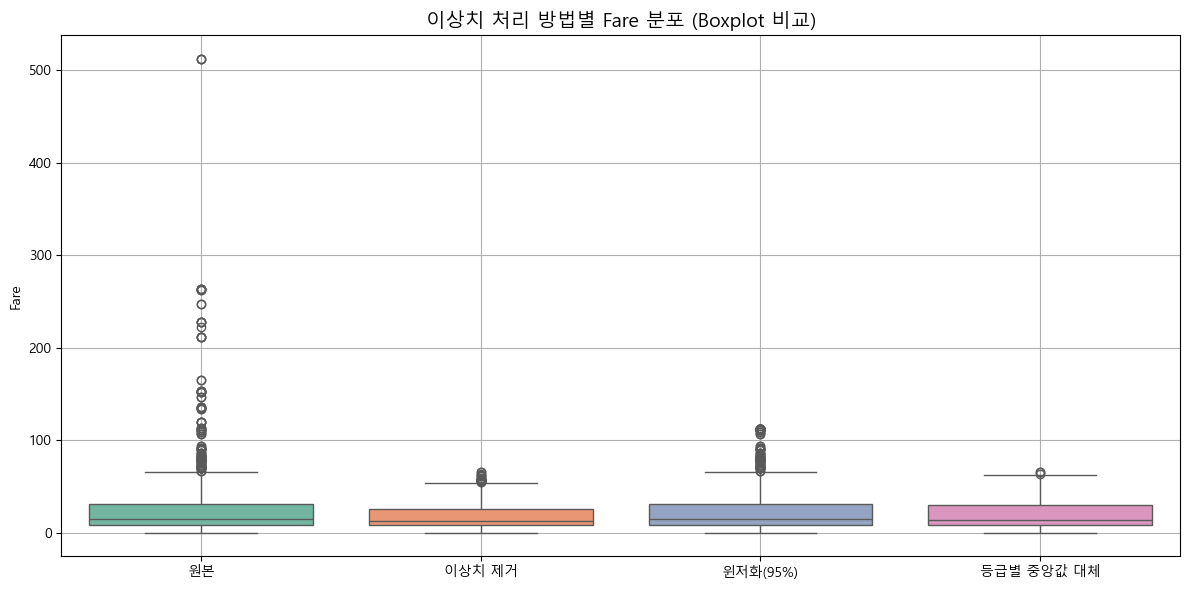

In [ ]:
# 5. 처리 결과 비교

# IQR 기준 설정
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# 처리 1: 원본
fare_original = df['fare']

# 처리 2: 이상치 제거
fare_removed = df[(df['fare'] >= lower) & (df['fare'] <= upper)]['fare']

# 처리 3: 윈저화 (95%)
fare_95 = df['fare'].quantile(0.95)
fare_winsorized = df['fare'].apply(lambda x: min(x, fare_95))

# 처리 4: 중앙값 대체 (등급별)
df_median = df.copy()
for pclass in df['pclass'].unique():
    class_median = df[(df['pclass'] == pclass) & (df['fare'] >= lower) & (df['fare'] <= upper)]['fare'].median()
    mask = (df['pclass'] == pclass) & ((df['fare'] < lower) | (df['fare'] > upper))
    df_median.loc[mask, 'fare'] = class_median
fare_median = df_median['fare']

# 시각화용 데이터프레임 구성
df_box = pd.DataFrame({
    '원본': fare_original,
    '이상치 제거': fare_removed.reindex(df.index),
    '윈저화(95%)': fare_winsorized,
    '등급별 중앙값 대체': fare_median
})

# 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, palette='Set2')
plt.title("이상치 처리 방법별 Fare 분포 (Boxplot 비교)", fontsize=14)
plt.ylabel("Fare")
plt.grid(True)
plt.tight_layout()
plt.show()

데이터를 기준으로 볼 때 아래와 같이 판단 가능함
 - 원본: 극단적으로 높은 이상치가 길게 꼬리를 형성함
 - 이상치 제거: 상자 범위가 작아지고 이상치가 사라짐
 - 윈저화 (95%): 극단값이 잘려서 상단이 뭉쳐 있음
 - 객실 등급별 중앙값 대체: 극단값이 완화되고 상단이 평균 쪽으로 수렴됨

어떠한 방법이 적정한지는 분석 목적 및 데이터 특성에 따라서 달라질 수 있으므로 한마디로 정답은 없다
 - 설명력 높은 통계 분석 - 이상치 제거
 - 모델 학습 및 예측 - 윈저화 또는 그룹별 대체
 - 정책/의사결정 모델(예: 가격 책정)에는 윈저화 + 도메인 지식 기반 조정
   이 유리

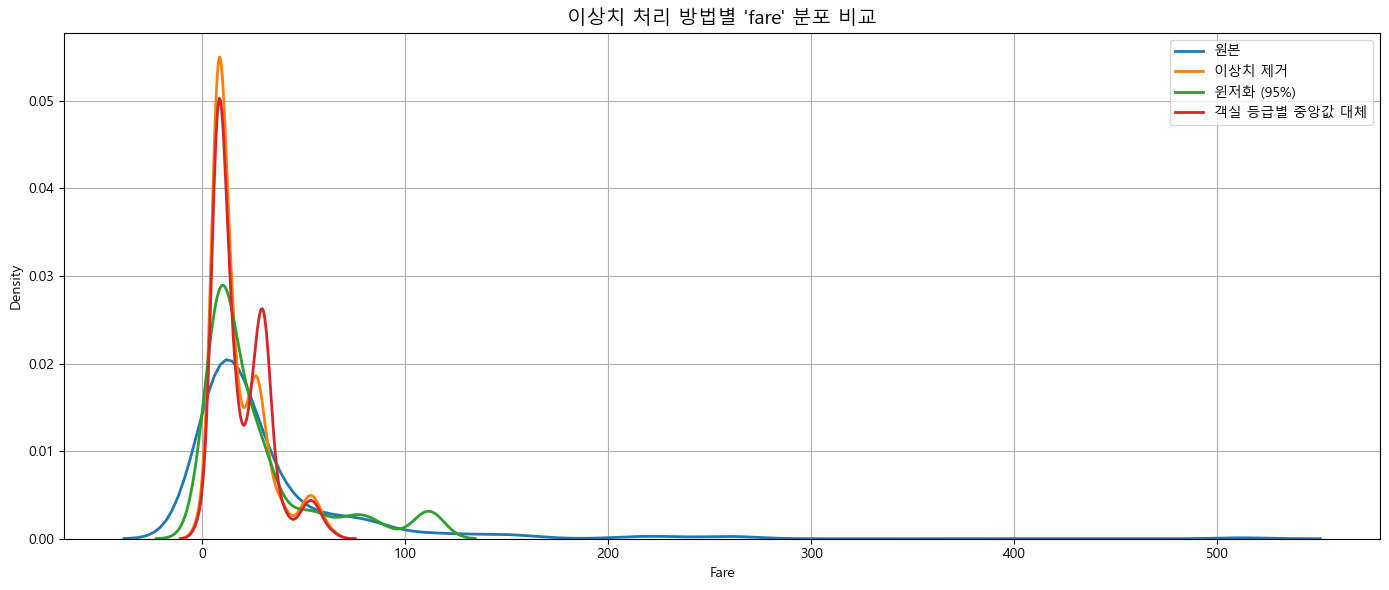

In [11]:
# 6. 시각화: 처리 방법별 분포 비교

# 2. IQR 계산 (이상치 기준)
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 3. 각 처리 방식별 fare 생성

# (1) 원본
fare_original = df['fare']

# (2) 이상치 제거
fare_removed = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]['fare']

# (3) 윈저화 (상한: 95%)
fare_95 = df['fare'].quantile(0.95)
fare_winsorized = df['fare'].apply(lambda x: min(x, fare_95))

# (4) 객실 등급별 중앙값 대체
df_median_replaced = df.copy()
for pclass in sorted(df['pclass'].unique()):
    median = df[(df['pclass'] == pclass) & 
                (df['fare'] >= lower_bound) & 
                (df['fare'] <= upper_bound)]['fare'].median()
    mask = (df['pclass'] == pclass) & ((df['fare'] < lower_bound) | (df['fare'] > upper_bound))
    df_median_replaced.loc[mask, 'fare'] = median
fare_median_replaced = df_median_replaced['fare']

# 4. 시각화
plt.figure(figsize=(14, 6))
sns.kdeplot(fare_original, label='원본', linewidth=2)
sns.kdeplot(fare_removed, label='이상치 제거', linewidth=2)
sns.kdeplot(fare_winsorized, label='윈저화 (95%)', linewidth=2)
sns.kdeplot(fare_median_replaced, label='객실 등급별 중앙값 대체', linewidth=2)
plt.title("이상치 처리 방법별 'fare' 분포 비교", fontsize=14)
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 7. 이상치 처리가 분석에 미치는 영향 확인
  # 평균, 분산 등 요약 통계 왜곡 방지
  # 분포 왜곡 완화
  # 시각화 정확도 향상

#####
 `나의 결론: 원 데이터를 그냥 두기에는 소수의 특이 데이터가 전체 분석 결과의 왜곡을 가져올 수 있기에 
 이상치를 제거하는 것이 맞는 것 같다. 다만, 어떠한 방법으로 이상치를 제거할 것인가에 대한 결정은 무엇을
 위한 분석인가를 먼저 확인 후 적정의 방법(물론 그것 또한 100% 정확하지는 않다!)을 찾아 적용이 필요하다.`